In [1]:
import GCN
import GAT
import utils
import torch.nn as nn
from torch.optim import SGD, Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

NCLASS = 7
NITER = 1000
NTEST = 100
LR = 0.001

# Data

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = utils.load_data()

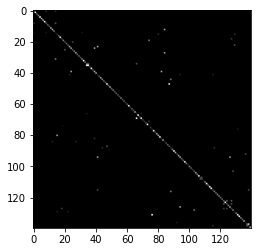

In [3]:
plt.imshow(adj[:len(idx_train), :len(idx_train)].cpu(), cmap ='gray')

# Model

In [4]:
# model = GCN.GCN(features.shape[0], features.shape[1], 1024, NCLASS, 0.3, False).cuda()
model = GAT.GAT(features.shape[1], 16, adj.shape[0], NCLASS, 0.3).cuda()
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model.parameters(), lr=LR)

# Training

In [5]:
features = features.cuda()
adj = adj.cuda()
labels = labels.cuda()

for i in range(NITER):
    model.train()
    optim.zero_grad()
    outputs = model(features, adj)
    predicts = outputs.argmax(dim=1)
    loss = loss_fn(outputs[idx_train], labels[idx_train])
    loss.backward()
    optim.step()
    
    precision = accuracy_score(labels[idx_train].cpu(), predicts[idx_train].cpu())
    print("[{:3d}/{:3d}]  loss: {:.4f}   precision: {:5.2%}".format(i+1, NITER, loss, precision))
    
    if(i % NTEST == NTEST-1):
        model.eval()
        outputs = model(features, adj)
        predicts = outputs.argmax(dim=1)
        loss = loss_fn(outputs[idx_test], labels[idx_test])
        precision = accuracy_score(labels[idx_test].cpu(), predicts[idx_test].cpu())
        print("=============================================")
        print("[Testing]  loss: {:.4f}   precision: {:5.2%}".format(loss, precision))
        print("=============================================")

[  1/1000]  loss: 1.9612   precision: 10.71%
[  2/1000]  loss: 1.9578   precision: 10.71%
[  3/1000]  loss: 1.9590   precision: 10.00%
[  4/1000]  loss: 1.9542   precision: 10.00%
[  5/1000]  loss: 1.9548   precision: 10.00%
[  6/1000]  loss: 1.9523   precision: 9.29%
[  7/1000]  loss: 1.9453   precision: 10.71%
[  8/1000]  loss: 1.9475   precision: 10.00%
[  9/1000]  loss: 1.9430   precision: 9.29%
[ 10/1000]  loss: 1.9426   precision: 10.00%
[ 11/1000]  loss: 1.9413   precision: 9.29%
[ 12/1000]  loss: 1.9382   precision: 10.71%
[ 13/1000]  loss: 1.9367   precision: 10.00%
[ 14/1000]  loss: 1.9344   precision: 10.71%
[ 15/1000]  loss: 1.9306   precision: 10.00%
[ 16/1000]  loss: 1.9317   precision: 10.00%
[ 17/1000]  loss: 1.9277   precision: 11.43%
[ 18/1000]  loss: 1.9239   precision: 10.00%
[ 19/1000]  loss: 1.9239   precision: 10.00%
[ 20/1000]  loss: 1.9233   precision: 12.14%
[ 21/1000]  loss: 1.9143   precision: 10.71%
[ 22/1000]  loss: 1.9150   precision: 11.43%
[ 23/1000]  l

[181/1000]  loss: 1.5288   precision: 57.14%
[182/1000]  loss: 1.5521   precision: 54.29%
[183/1000]  loss: 1.5418   precision: 55.71%
[184/1000]  loss: 1.5390   precision: 55.71%
[185/1000]  loss: 1.5221   precision: 52.14%
[186/1000]  loss: 1.4805   precision: 52.14%
[187/1000]  loss: 1.5700   precision: 57.14%
[188/1000]  loss: 1.5622   precision: 51.43%
[189/1000]  loss: 1.5477   precision: 51.43%
[190/1000]  loss: 1.5248   precision: 55.00%
[191/1000]  loss: 1.5248   precision: 55.00%
[192/1000]  loss: 1.4825   precision: 57.14%
[193/1000]  loss: 1.5262   precision: 57.14%
[194/1000]  loss: 1.4871   precision: 56.43%
[195/1000]  loss: 1.5008   precision: 57.86%
[196/1000]  loss: 1.4798   precision: 56.43%
[197/1000]  loss: 1.4999   precision: 55.71%
[198/1000]  loss: 1.4983   precision: 58.57%
[199/1000]  loss: 1.4724   precision: 58.57%
[200/1000]  loss: 1.5043   precision: 58.57%
[Testing]  loss: 1.6722   precision: 40.60%
[201/1000]  loss: 1.4888   precision: 59.29%
[202/1000] 

[359/1000]  loss: 1.0239   precision: 85.00%
[360/1000]  loss: 0.9973   precision: 84.29%
[361/1000]  loss: 1.0364   precision: 83.57%
[362/1000]  loss: 0.9635   precision: 82.86%
[363/1000]  loss: 1.0667   precision: 80.00%
[364/1000]  loss: 1.0371   precision: 82.86%
[365/1000]  loss: 1.0419   precision: 85.71%
[366/1000]  loss: 1.0301   precision: 84.29%
[367/1000]  loss: 1.0250   precision: 83.57%
[368/1000]  loss: 1.0208   precision: 83.57%
[369/1000]  loss: 1.0486   precision: 85.71%
[370/1000]  loss: 1.0177   precision: 85.71%
[371/1000]  loss: 1.0111   precision: 85.00%
[372/1000]  loss: 0.9927   precision: 85.71%
[373/1000]  loss: 0.9889   precision: 84.29%
[374/1000]  loss: 0.9581   precision: 86.43%
[375/1000]  loss: 1.0012   precision: 86.43%
[376/1000]  loss: 1.0267   precision: 85.00%
[377/1000]  loss: 0.9694   precision: 86.43%
[378/1000]  loss: 0.9619   precision: 86.43%
[379/1000]  loss: 1.0053   precision: 85.71%
[380/1000]  loss: 0.9816   precision: 86.43%
[381/1000]

[537/1000]  loss: 0.6199   precision: 90.71%
[538/1000]  loss: 0.6603   precision: 90.71%
[539/1000]  loss: 0.6166   precision: 92.14%
[540/1000]  loss: 0.6434   precision: 90.71%
[541/1000]  loss: 0.6253   precision: 92.14%
[542/1000]  loss: 0.7137   precision: 89.29%
[543/1000]  loss: 0.7169   precision: 90.00%
[544/1000]  loss: 0.7169   precision: 92.86%
[545/1000]  loss: 0.6654   precision: 93.57%
[546/1000]  loss: 0.6811   precision: 89.29%
[547/1000]  loss: 0.6606   precision: 91.43%
[548/1000]  loss: 0.6545   precision: 90.00%
[549/1000]  loss: 0.7345   precision: 90.00%
[550/1000]  loss: 0.7235   precision: 90.00%
[551/1000]  loss: 0.5895   precision: 91.43%
[552/1000]  loss: 0.6616   precision: 90.71%
[553/1000]  loss: 0.6513   precision: 90.71%
[554/1000]  loss: 0.7191   precision: 85.00%
[555/1000]  loss: 0.6858   precision: 89.29%
[556/1000]  loss: 0.6351   precision: 91.43%
[557/1000]  loss: 0.6477   precision: 92.86%
[558/1000]  loss: 0.6468   precision: 90.71%
[559/1000]

[715/1000]  loss: 0.5026   precision: 90.71%
[716/1000]  loss: 0.4605   precision: 96.43%
[717/1000]  loss: 0.5339   precision: 92.86%
[718/1000]  loss: 0.4723   precision: 93.57%
[719/1000]  loss: 0.5029   precision: 91.43%
[720/1000]  loss: 0.4427   precision: 93.57%
[721/1000]  loss: 0.4435   precision: 95.00%
[722/1000]  loss: 0.4829   precision: 93.57%
[723/1000]  loss: 0.4978   precision: 92.14%
[724/1000]  loss: 0.3837   precision: 96.43%
[725/1000]  loss: 0.4272   precision: 96.43%
[726/1000]  loss: 0.5049   precision: 94.29%
[727/1000]  loss: 0.5050   precision: 90.00%
[728/1000]  loss: 0.4653   precision: 93.57%
[729/1000]  loss: 0.4684   precision: 92.14%
[730/1000]  loss: 0.5187   precision: 92.86%
[731/1000]  loss: 0.4645   precision: 91.43%
[732/1000]  loss: 0.4271   precision: 95.71%
[733/1000]  loss: 0.4913   precision: 93.57%
[734/1000]  loss: 0.4780   precision: 92.86%
[735/1000]  loss: 0.4309   precision: 92.86%
[736/1000]  loss: 0.4312   precision: 95.71%
[737/1000]

[895/1000]  loss: 0.3234   precision: 94.29%
[896/1000]  loss: 0.3215   precision: 94.29%
[897/1000]  loss: 0.4309   precision: 94.29%
[898/1000]  loss: 0.3180   precision: 95.00%
[899/1000]  loss: 0.3575   precision: 95.71%
[900/1000]  loss: 0.3223   precision: 95.71%
[Testing]  loss: 0.7458   precision: 79.90%
[901/1000]  loss: 0.2981   precision: 98.57%
[902/1000]  loss: 0.3113   precision: 94.29%
[903/1000]  loss: 0.3356   precision: 95.71%
[904/1000]  loss: 0.3703   precision: 92.86%
[905/1000]  loss: 0.3989   precision: 92.14%
[906/1000]  loss: 0.3897   precision: 90.71%
[907/1000]  loss: 0.3158   precision: 94.29%
[908/1000]  loss: 0.3575   precision: 92.14%
[909/1000]  loss: 0.3566   precision: 95.71%
[910/1000]  loss: 0.3789   precision: 95.00%
[911/1000]  loss: 0.4248   precision: 92.14%
[912/1000]  loss: 0.2799   precision: 96.43%
[913/1000]  loss: 0.3439   precision: 95.71%
[914/1000]  loss: 0.3902   precision: 95.00%
[915/1000]  loss: 0.3705   precision: 94.29%
[916/1000] 